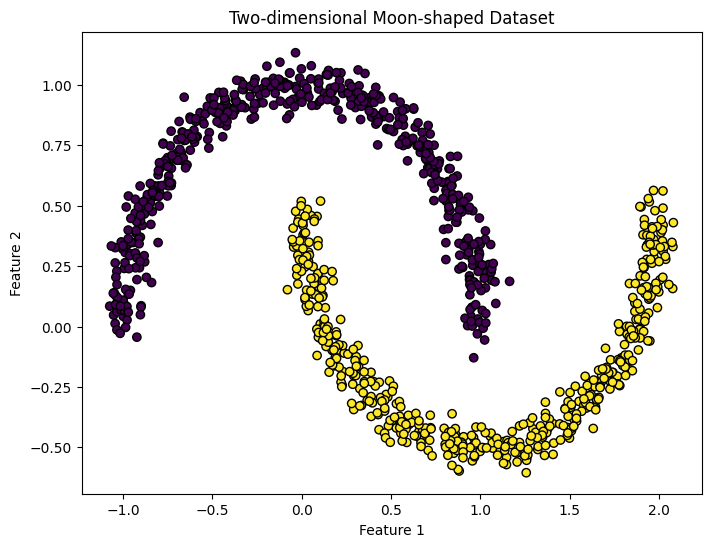

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Create a dataset with 1,000 samples
X, y = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('Two-dimensional Moon-shaped Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [3]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# 创建一个包含1000个样本的数据集
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# 将数据集分成80%的训练集和20%的测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 输出各个数据集的大小以验证分割是否正确
print(X_train.shape)
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


(800, 2)
Training set size: 800
Test set size: 200


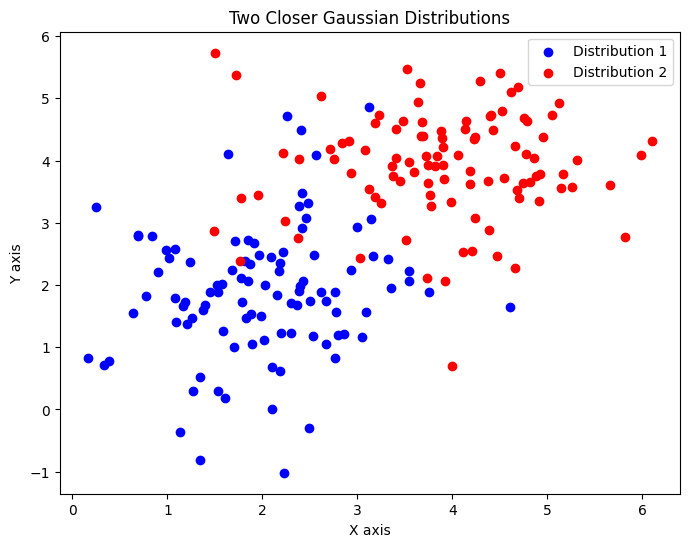

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# 定义两个更接近的正态分布
mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]  # 协方差矩阵
data1 = np.random.multivariate_normal(mean1, cov1, 100)

mean2 = [4, 4]
cov2 = [[1, 0], [0, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 绘制数据点
plt.figure(figsize=(8, 6))
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Distribution 1')
plt.scatter(data2[:, 0], data2[:, 1], color='red', label='Distribution 2')
plt.legend()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Two Closer Gaussian Distributions')
plt.show()


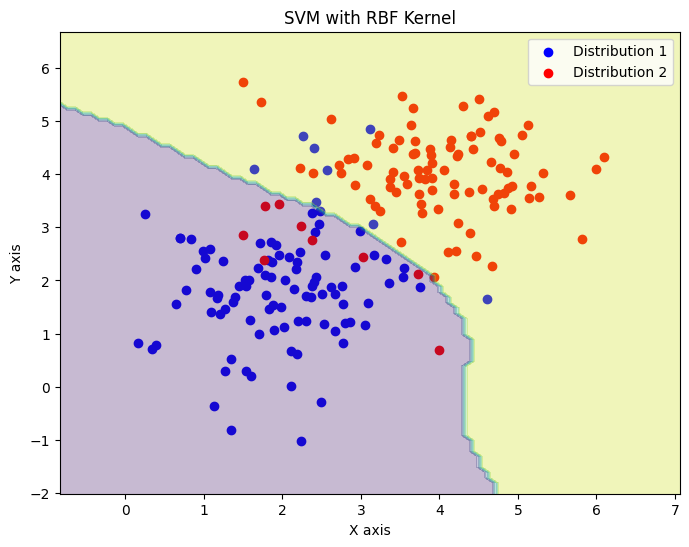

In [5]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 合并数据集并创建标签
X = np.vstack((data1, data2))
y = np.array([0] * 100 + [1] * 100)

# 创建带有RBF核的SVM分类器
svm = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

# 拟合数据
svm.fit(X, y)

# 绘制决策边界
plt.figure(figsize=(8, 6))
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Distribution 1')
plt.scatter(data2[:, 0], data2[:, 1], color='red', label='Distribution 2')

# 创建网格来绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.legend()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('SVM with RBF Kernel')
plt.show()


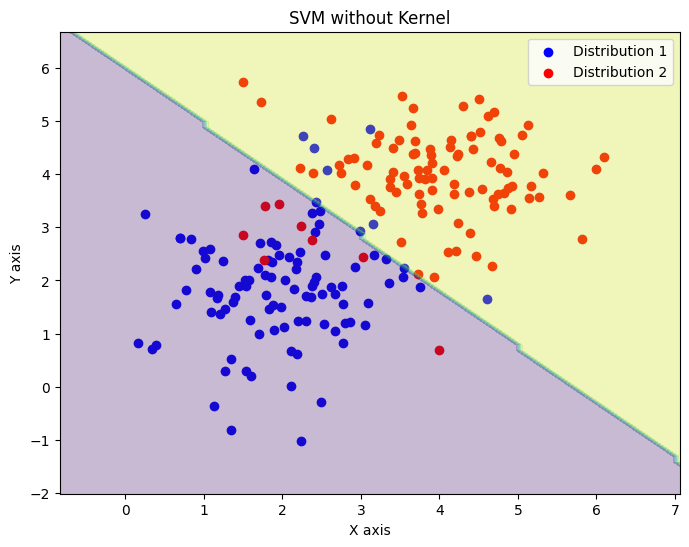

In [6]:
# 创建不带核函数的SVM分类器
svm_linear = make_pipeline(StandardScaler(), SVC(kernel='linear'))

# 拟合数据
svm_linear.fit(X, y)

# 绘制决策边界
plt.figure(figsize=(8, 6))
plt.scatter(data1[:, 0], data1[:, 1], color='blue', label='Distribution 1')
plt.scatter(data2[:, 0], data2[:, 1], color='red', label='Distribution 2')

# 创建网格来绘制决策边界
Z_linear = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)

plt.contourf(xx, yy, Z_linear, alpha=0.3)
plt.legend()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('SVM without Kernel')
plt.show()



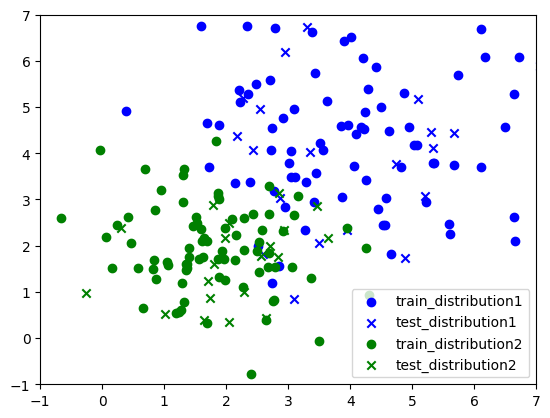

In [21]:
np.random.seed(0)
# Define two Gaussian distributions
# mean1 = [0, 0]
# mean1 = [4, 4]
mean1 = [4, 4]
# cov1 = [[0.5, 0], [0, 0.5]]
# cov1 = [[1, 0], [0, 1]]
cov1 = [[2, 0], [0, 2]]
mean2 = [2, 2]
cov2 = [[1, 0], [0, 1]]
# Sample 100 points from each
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
# Keep 80 points per distribution as the training (160 in total)
training_inputs = np.vstack((np.hstack((x1[:80], x2[:80])), np.hstack((y1[:80], y2[:80])))).T
labels = np.hstack((np.ones(80), -np.ones(80)))
# 20 for the test (40 in total)
test_inputs = np.vstack((np.hstack((x1[80:], x2[80:])), np.hstack((y1[80:], y2[80:])))).T
test_labels = np.hstack((np.ones(20), -np.ones(20)))

# 可视化
import matplotlib.pyplot as plt
plt.scatter(x1[:80], y1[:80], c='b', marker='o', label='train_distribution1')
plt.scatter(x1[80:], y1[80:], c='b', marker='x', label='test_distribution1')
plt.scatter(x2[:80], y2[:80], c='g', marker='o', label='train_distribution2')
plt.scatter(x2[80:], y2[80:], c='g', marker='x', label='test_distribution2')
plt.legend(loc='lower right')

plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.show()

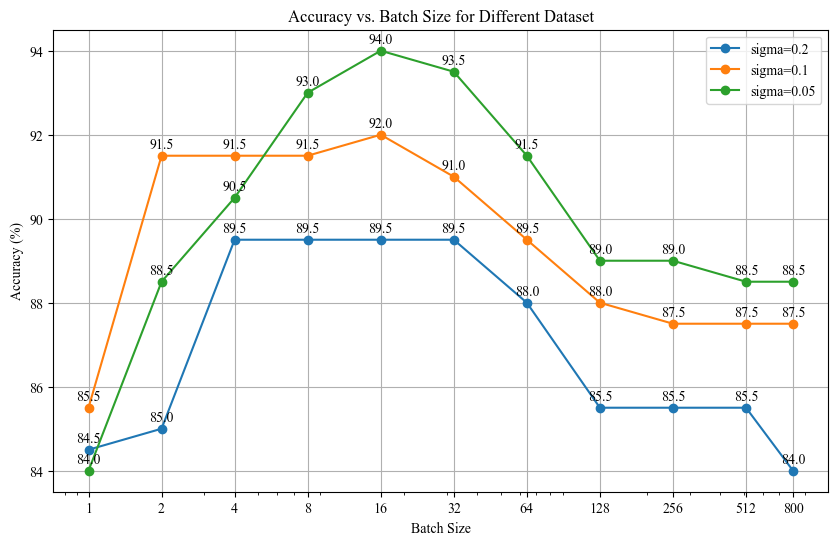

In [12]:
import matplotlib.pyplot as plt

# Data
sigma_values = [0.2, 0.1, 0.05]
batch_sizes = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 800]
accuracy_values = {
    0.2: [84.5, 85, 89.5, 89.5, 89.5, 89.5, 88, 85.5, 85.5, 85.5, 84],
    0.1: [85.5, 91.5, 91.5, 91.5, 92, 91, 89.5, 88, 87.5, 87.5, 87.5],
    0.05: [84, 88.5, 90.5, 93, 94, 93.5, 91.5, 89, 89, 88.5, 88.5]
}

# Plotting
plt.figure(figsize=(10, 6))
for sigma, acc_values in accuracy_values.items():
    plt.plot(batch_sizes, acc_values, marker='o', label=f'sigma={sigma}')
    for i, txt in enumerate(acc_values):
        plt.annotate(f'{txt:.1f}', (batch_sizes[i], acc_values[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Batch Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Batch Size for Different Dataset')
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.xticks(batch_sizes, batch_sizes)
plt.show()

